In [13]:
# General imports
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pandas as pd
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from IPython.display import Video, display

# Custom imports
sys.path.append('..')
import models.vicsek as vicsek
import models.pid as pid
import visualisation as visualisation
import utils

# Lauching simulations

In [14]:
# Initialize the Vicsek model.
radius = 1
L = 5
N = 30
tmax = 1000

In [15]:
simulator = pid.PID_Flock(numberOfParticles=N, domainSize=(L, L), radius=radius, speed=0.3, noiseAmplitude=0.75)
# Simulate the model.
simulationData = simulator.simulate(dt = 1, tmax=tmax)

# Extract simulation data.
errorHistory = simulationData[4]
dfPID = utils.simulationDataToDataframe(simulationData)
dfPID.head() 

,t,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,theta_x_25,theta_y_25,theta_x_26,theta_y_26,theta_x_27,theta_y_27,theta_x_28,theta_y_28,theta_x_29,theta_y_29
0,0.0,4.903750,4.143612,2.249719,0.129040,4.689978,2.839629,0.467511,1.421491,1.162709,...,0.827106,0.562047,0.179887,-0.983687,-0.345417,-0.938449,-0.295595,0.955313,0.995134,-0.098532
1,1.0,4.656059,4.312873,2.418264,4.880862,4.958759,2.706374,0.390329,1.711392,1.031543,...,0.827106,0.562047,0.179887,-0.983687,-0.345417,-0.938449,-0.295595,0.955313,0.995134,-0.098532
2,2.0,4.357571,4.282791,2.383024,4.582939,0.258105,2.686580,0.614958,1.910242,1.108265,...,0.325410,0.945573,0.508782,-0.860896,-0.720427,-0.693531,-0.709454,0.704752,0.987489,-0.157688
3,3.0,4.236915,4.557458,2.485747,4.301074,0.531339,2.562712,0.704144,2.196679,1.117014,...,0.853730,0.520716,0.539881,-0.841741,-0.125077,-0.992147,-0.579154,0.815218,0.867054,-0.498215
4,4.0,3.956754,4.450172,2.548125,4.007630,0.829761,2.531985,0.759662,2.491497,1.115520,...,0.777109,0.629367,0.707552,-0.706662,-0.836290,-0.548287,-0.128290,0.991737,0.939661,-0.342107


In [16]:
simulator = vicsek.Vicsek(numberOfParticles=N, domainSize=(L, L), radius=radius, speed=0.3, noiseAmplitude=0.2)

simulationData = simulator.simulate(dt = 1, tmax=tmax)

dfVicsek = utils.simulationDataToDataframe(simulationData)
dfVicsek.head()

,t,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,theta_x_25,theta_y_25,theta_x_26,theta_y_26,theta_x_27,theta_y_27,theta_x_28,theta_y_28,theta_x_29,theta_y_29
0,0.0,3.836905,3.818620,1.789827,4.223437,4.797361,3.834445,0.114683,0.359516,2.950543,...,0.991788,0.127889,-0.960570,-0.278038,-0.827288,-0.561778,0.703921,-0.710278,0.994719,0.102634
1,1.0,3.555359,3.715025,2.059720,4.354426,4.937107,3.568980,0.411430,0.403576,2.698339,...,0.951185,0.308622,-0.718996,-0.695014,-0.867754,-0.496994,0.254110,-0.967175,0.753270,-0.657712
2,2.0,3.311879,3.539761,2.166231,4.073970,0.194247,3.414453,0.701573,0.479845,2.472324,...,0.947378,0.320117,-0.449000,-0.893532,-0.869883,-0.493258,0.875955,-0.482392,0.423983,-0.905670
3,3.0,3.081419,3.347699,2.244993,3.784494,0.491092,3.371059,0.986407,0.574024,2.367394,...,0.702884,-0.711305,0.670200,-0.742181,-0.704749,-0.709457,0.979616,-0.200879,0.089668,-0.995972
4,4.0,2.972690,3.068095,2.253181,3.484605,0.791089,3.372524,1.163580,0.331930,2.299294,...,0.398242,-0.917280,0.082705,-0.996574,-0.469386,-0.882993,0.913949,-0.405828,0.388838,-0.921306


# Compute error of each bird 

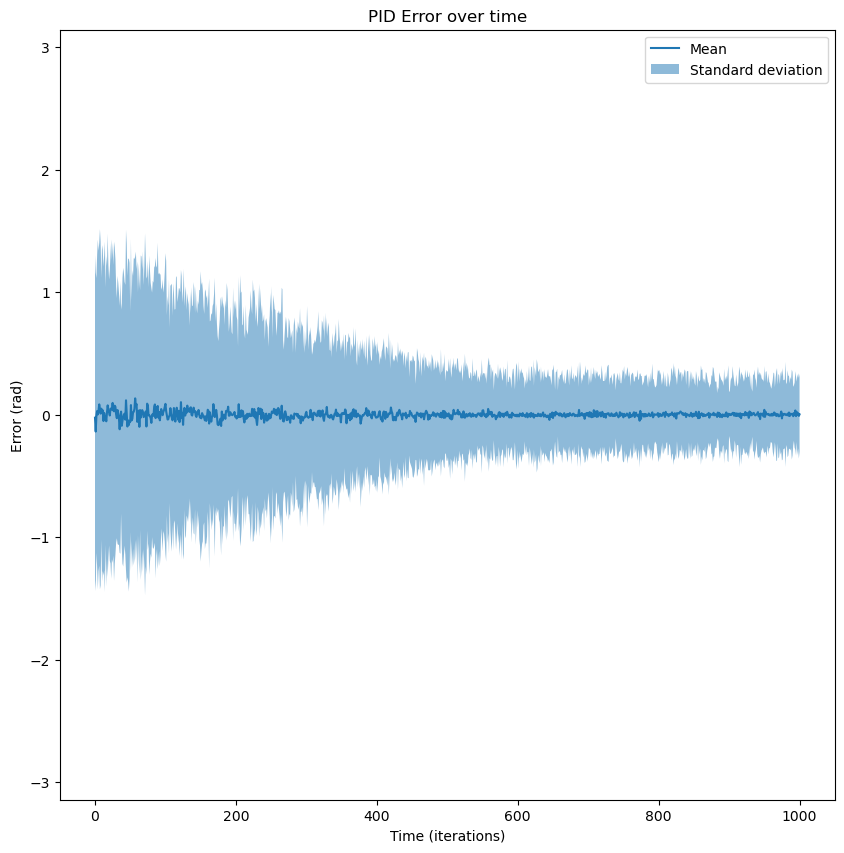

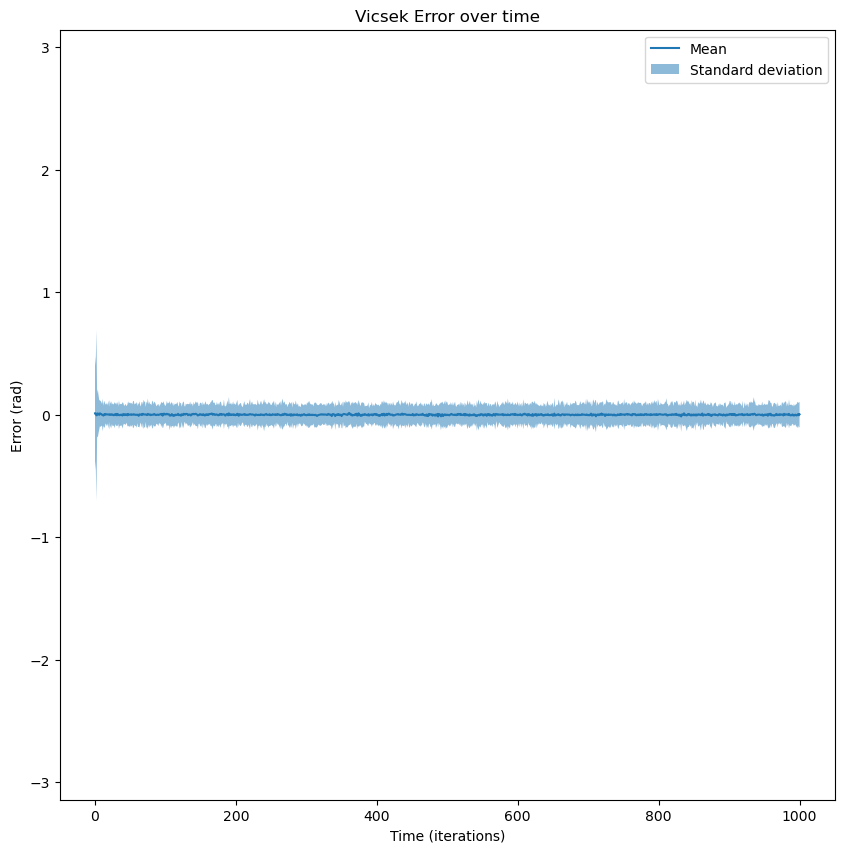

In [17]:
dfErrorPID = utils.getError(dfPID, radius)
dfErrorVicsek = utils.getError(dfVicsek, radius)

fig, ax = visualisation.plot_error_over_time(dfPID, radius=radius)
ax.set_title('PID Error over time')
plt.show()

fig, ax = visualisation.plot_error_over_time(dfVicsek, radius=radius)
ax.set_title('Vicsek Error over time')
plt.show()


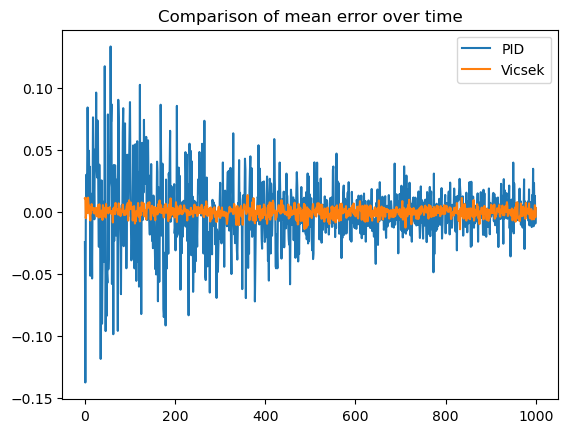

In [18]:
# mean error over time
meanErrorPID = dfErrorPID.mean(axis=1)
meanErrorVicsek = dfErrorVicsek.mean(axis=1)

plt.plot(meanErrorPID, label="PID")
plt.plot(meanErrorVicsek, label="Vicsek")
plt.legend()
plt.title('Comparison of mean error over time')
plt.show()